# Processing Weather Data

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
station = pd.read_fwf('data/allstations.txt',colspecs=[(0,11),(38,40)],names=['ID','STATE'])

In [6]:
station.head()

,ID,STATE
0,AQC00914000,AS
1,AQW00061705,AS
2,CAW00064757,ON
3,CQC00914080,MP
4,CQC00914801,MP


In [32]:
start = 17+np.arange(12)*7
monthly_file_width = [(0,11)]+zip(start,start+6)
col_names = ['ID','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
precip = pd.read_fwf('data/mly-prcp-normal.txt',colspecs=monthly_file_width,names=col_names)
snow = pd.read_fwf('data/mly-snow-normal.txt',colspecs=monthly_file_width,names=col_names)

In [33]:
precip.head()

,ID,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,AQC00914000,2116,2022,1840,1780,1820,1306,1274,1383,1570,2003,2036,2242
1,AQW00061705,1448,1266,1166,1102,1062,586,647,630,763,1011,1130,1452
2,CAW00064757,160,205,200,286,359,310,366,238,229,209,338,272
3,CQC00914080,384,442,240,503,380,504,1016,1242,1165,1099,776,588
4,CQC00914801,524,521,305,466,401,520,1071,1312,1386,1226,838,554


In [34]:
snow.head()

,ID,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,AQC00914000,0,0,0,0,0,0,0,0,0,0,0,0
1,AQW00061705,0,0,0,0,0,0,0,0,0,0,0,0
2,CQC00914080,0,0,0,0,0,0,0,0,0,0,0,0
3,CQC00914801,0,0,0,0,0,0,0,0,0,0,0,0
4,CQC00914855,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
print station.shape, precip.shape, snow.shape

(9887, 2) (9307, 13) (6378, 13)


## Aggregating Data by State

#### Precipitation Data

In [38]:
precip = precip.merge(station,how='left',on='ID')

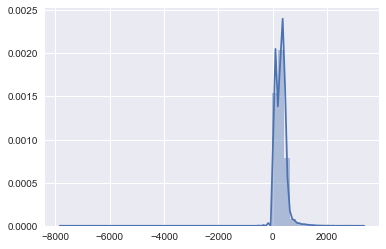

In [50]:
#check distribution
sns.distplot(precip.iloc[:,1:-1].values.flatten())

In [52]:
#Check special values
precip.iloc[:,1:-1].values[np.where(precip.iloc[:,1:-1].values<0)]

array([-7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777,
       -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777,
       -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777,
       -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777,
       -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777,
       -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777,
       -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777, -7777])

This flag means "a non-zero value that would round to zero". We will set these values to zero. 

In [54]:
precip = precip.applymap(lambda x: 0. if x<0 else x)

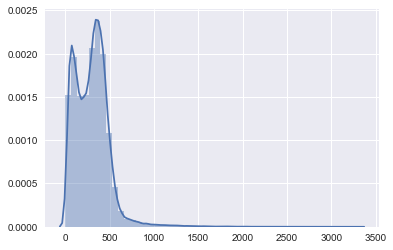

In [55]:
#Check distribution again
sns.distplot(precip.iloc[:,1:-1].values.flatten())

#### Snow Data

In [45]:
snow = snow.merge(station,how='left',on='ID')

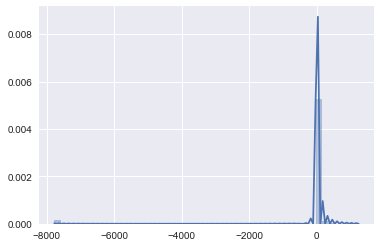

In [56]:
sns.distplot(snow.iloc[:,1:-1].values.flatten())

In [58]:
set(snow.iloc[:,1:-1].values[np.where(snow.iloc[:,1:-1].values<0)])

{-7777}

In [59]:
snow = snow.applymap(lambda x: 0. if x<0 else x)

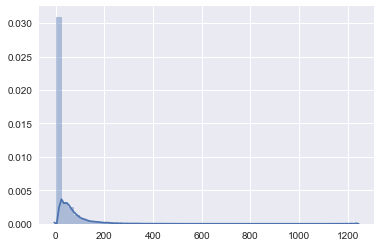

In [60]:
sns.distplot(snow.iloc[:,1:-1].values.flatten())

#### Aggregate

In [65]:
precip_state = precip.groupby(by='STATE').mean().astype(int)
snow_state = snow.groupby(by='STATE').mean().astype(int)

In [67]:
precip_state

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
STATE,,,,,,,,,,,,
AK,383,289,268,217,223,238,310,407,526,518,407,431
AL,515,520,542,432,442,466,514,413,394,345,482,492
AR,360,387,468,477,537,410,375,291,378,469,499,479
AS,1782,1644,1503,1441,1441,946,960,1006,1166,1507,1583,1847
AZ,130,127,117,52,33,26,189,226,128,98,88,124
CA,440,438,353,166,91,31,12,17,40,131,271,414
CO,74,76,129,158,181,160,208,215,145,131,96,82
CT,363,326,433,439,424,447,426,427,419,468,434,407
DE,333,291,424,377,399,396,446,404,443,358,348,366


In [68]:
snow_state

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
STATE,,,,,,,,,,,,
AK,161,132,112,45,8,0,0,0,9,67,134,177
AL,2,0,2,0,0,0,0,0,0,0,0,0
AR,14,11,4,0,0,0,0,0,0,0,0,4
AS,0,0,0,0,0,0,0,0,0,0,0,0
AZ,23,21,16,6,0,0,0,0,0,1,8,17
CA,29,28,25,10,1,0,0,0,0,1,11,26
CO,105,99,121,88,22,1,0,0,6,39,93,111
CT,114,99,70,15,0,0,0,0,0,0,13,79
DE,43,53,11,1,0,0,0,0,0,0,2,18


In [70]:
#write to files
precip_state.to_csv('data/precip_state.csv')
snow_state.to_csv('data/snow_state.csv')